In [3]:
# compare
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
import numpy as np
import urllib
import requests
import pandas as pd
import requests
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn import datasets
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize

In [4]:
baseball6 = pd.read_csv("baseball5")

In [5]:
easy_baseball4 = pd.read_csv('easy_baseball3')

In [57]:
X = baseball6[['H', 'HR','BB','K', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
y1 = baseball6.FIP
y2= baseball6.QS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#F
#QS: Taken out IP, ER, BF, R, H, ERA, HR in that order due to overly predictive nature of features, or feature-engineering rooted nature 
#X = baseball5[['BB','K','Pit','Str', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]

In [58]:
rt = tree.DecisionTreeClassifier(
 min_samples_split=30, min_samples_leaf=10,
  random_state=0)
rt.fit(X,y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

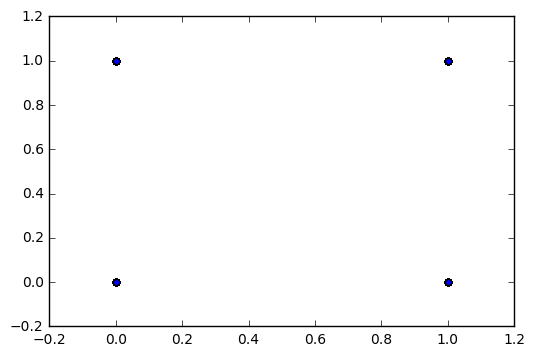

In [15]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=42, test_size=0.30)
y_pred = rt.predict(X_test)

plt.scatter(y_test, y_pred)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.13303616476654678

In [17]:
from sklearn.cross_validation import cross_val_score

scores = []
best_score = 0
best_depth = 0

for i in range(1, 9):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    current_score = cross_val_score(model, X, y2, cv=10, scoring='mean_squared_error')
    # MSE negative in sklearn, reversed it
    current_score = -current_score
    # square root of the MSE to get desired error
    current_score = np.sqrt(current_score)
    # then we will have an array, so we want the mean so we can get a real idea
    current_score = np.mean(current_score)
    
    # If the score mean is better than the current best, or best is the default, then update
    if current_score < best_score or best_score == 0:
        best_score = current_score
        best_depth = i
        
    # store to plot anyway
    scores.append(current_score)
scores

[0.59684265774896783,
 0.59386026320832186,
 0.57139229628675747,
 0.55932107407001996,
 0.5546010267263588,
 0.55312903548170533,
 0.55610737973951685,
 0.55920246960276643]

Best score: 
0.553129035482
Best depth: 
6


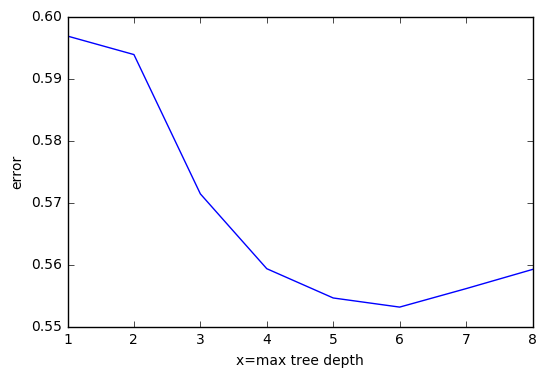

In [18]:
print 'Best score: ' 
print best_score
print "Best depth: " 
print best_depth

# now actually fit the model
model = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
model.fit(X, y2)

# plot our results
plt.figure()
plt.plot(range(1, 9), scores)
plt.xlabel('x=max tree depth')
plt.ylabel('error')

In [19]:
pd.DataFrame({'feature':X.columns, 'importance':model.feature_importances_})

,feature,importance
0,BB,0.022962
1,K,0.346085
2,Ctct,0.223653
3,StS,0.029354
4,StL,0.070016
5,GB,0.180479
6,FB,0.081106
7,LD,0.046346


In [59]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X, y2)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
et.fit(X,y2)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

,dt_importance,rf_importance,et_importance
H,0.273564,0.186264,0.181139
Ctct,0.232083,0.148891,0.128006
GB,0.129351,0.117725,0.112819
StL,0.051053,0.109865,0.092989
K,0.083339,0.102241,0.107014
FB,0.095482,0.086799,0.084656
StS,0.044298,0.079218,0.082585
HR,0.045493,0.061072,0.083599
LD,0.015563,0.054150,0.066287
BB,0.029775,0.053776,0.060905


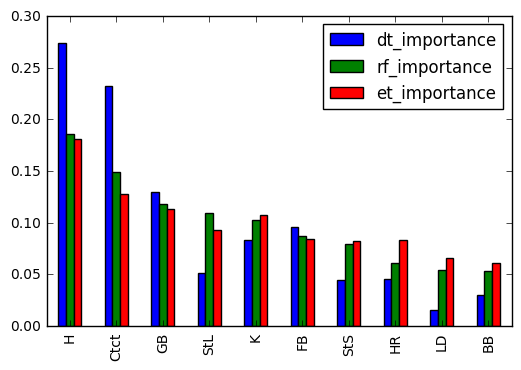

In [61]:
importances = pd.DataFrame(zip(rt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar')
importances

In [67]:
X = easy_baseball4[['H', 'HR','BB','K', 'Ctct', 'StS', 'StL', 'GB', 'FB', 'LD']]
y2= easy_baseball4.QS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
rt = tree.DecisionTreeClassifier(
 min_samples_split=30, min_samples_leaf=10,
  random_state=0)
rt.fit(X,y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=10,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [41]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=42, test_size=0.30)
y_pred = rt.predict(X_test)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

In [43]:
from sklearn.cross_validation import cross_val_score

scores = []
best_score = 0
best_depth = 0

for i in range(1, 9):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    current_score = cross_val_score(model, X, y2, cv=10, scoring='mean_squared_error')
    # MSE negative in sklearn, reversed it
    current_score = -current_score
    # square root of the MSE to get desired error
    current_score = np.sqrt(current_score)
    # then we will have an array, so we want the mean so we can get a real idea
    current_score = np.mean(current_score)
    
    # If the score mean is better than the current best, or best is the default, then update
    if current_score < best_score or best_score == 0:
        best_score = current_score
        best_depth = i
        
    # store to plot anyway
    scores.append(current_score)
scores

[0.64132744251279594,
 0.62387871315144361,
 0.56150498965268869,
 0.53456226893996539,
 0.51437308738929277,
 0.47848136515852158,
 0.45539205948333594,
 0.4247125939118308]

Best score: 
0.424712593912
Best depth: 
8


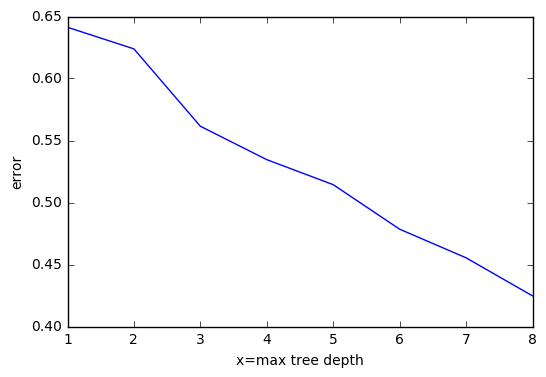

In [44]:
print 'Best score: ' 
print best_score
print "Best depth: " 
print best_depth

# now actually fit the model
model = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
model.fit(X, y2)

# plot our results
plt.figure()
plt.plot(range(1, 9), scores)
plt.xlabel('x=max tree depth')
plt.ylabel('error')

In [45]:
pd.DataFrame({'feature':X.columns, 'importance':model.feature_importances_})

,feature,importance
0,BB,0.027739
1,K,0.153427
2,Ctct,0.324650
3,StS,0.098016
4,StL,0.067119
5,GB,0.176258
6,FB,0.124134
7,LD,0.028657


In [69]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X, y2)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
et.fit(X,y2)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

,dt_importance,rf_importance,et_importance
Ctct,0.187344,0.149181,0.126992
H,0.151826,0.136312,0.148496
GB,0.109906,0.120014,0.111774
HR,0.109295,0.113222,0.100333
StL,0.090671,0.106752,0.089735
StS,0.106841,0.100860,0.098009
FB,0.085581,0.090189,0.086942
K,0.074365,0.074598,0.107651
LD,0.038875,0.058456,0.062431
BB,0.045297,0.050417,0.067636


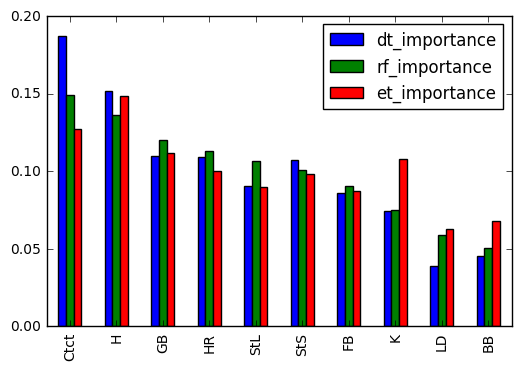

In [71]:
importances = pd.DataFrame(zip(rt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar')
importances

In [21]:
cross_val_score(model, X, y2, cv=5)

array([ 0.7       ,  0.6814562 ,  0.67918089,  0.70079636,  0.68792711])

In [34]:
#PARAMETERS = {'max_depth':[6], 'max_features':[3], 
              #'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              #'min_samples_split':[1,2,3,4]}
PARAMETERS = {'max_depth':[best_depth]}
SCORING = 'mean_squared_error'

In [35]:
from sklearn.grid_search import GridSearchCV

#Grid Search
model = DecisionTreeClassifier()
clf = GridSearchCV(model, PARAMETERS, scoring=SCORING, verbose=True, n_jobs=-1)
clf.fit(X, y2)
model.fit(X, y2)

ValueError: Parameter values should be a list.

In [31]:
print clf.best_estimator_
print clf.best_score_
print np.sqrt(-clf.best_score_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=3, max_leaf_nodes=9, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
-0.312855517634
0.559334888625


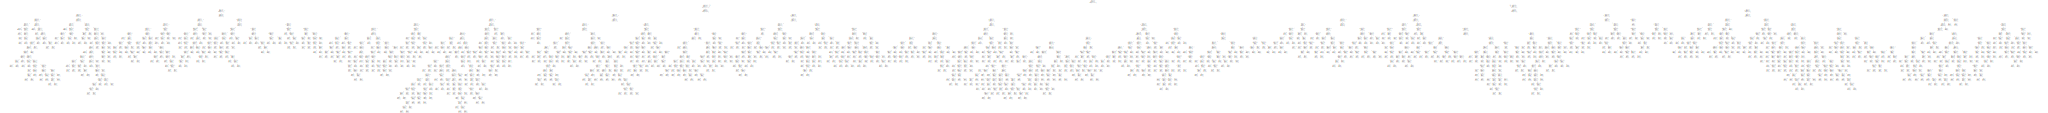

In [32]:
import graphviz

export_graphviz(model, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
xStand = StandardScaler().fit_transform(X)